In [2]:
####################

#@Author: Yongyi Zhao
# Date: 5-28-2020

####################

In [1]:
#module needed

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage

**1. 以Lena为原始图像，通过OpenCV实现平均滤波，高斯滤波及中值滤波，比较滤波结果。**

In [13]:
lena = cv.cvtColor(cv.imread("lena.jpg"),cv.COLOR_BGR2RGB)

In [5]:
lena_mean = cv.blur(lena, (5,5))

In [6]:
lena_Guassian = cv.GaussianBlur(lena,(5,5),0) 

In [7]:
lena_median = cv.medianBlur(lena, 5) 

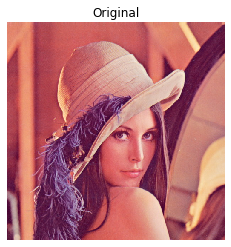

In [8]:
plt.imshow(lena)
plt.axis('off')
plt.title('Original')
plt.show()

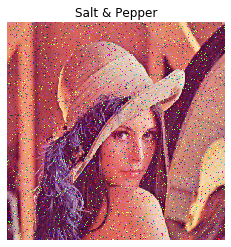

In [9]:
saltpepper = skimage.util.random_noise(lena, mode='s&p', seed=None, clip=True,)
saltpepper = saltpepper*255 
saltpepper = saltpepper.astype(np.int)
plt.imshow(saltpepper)
plt.axis('off')
plt.title('Salt & Pepper')
plt.show()

In [10]:
salt_mean = cv.blur(saltpepper, (5,5))

In [11]:
salt_Guassian = cv.GaussianBlur(saltpepper.astype(np.uint8),(5,5),0) 

In [12]:
salt_median = cv.medianBlur(saltpepper.astype(np.uint8), 5) 

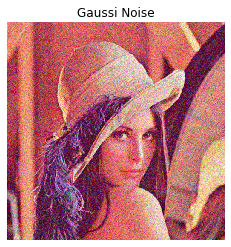

In [13]:
gaussi = skimage.util.random_noise(lena, mode='gaussian', seed=None, clip=True,)
gaussi = gaussi*255 
gaussi = gaussi.astype(np.int)
plt.imshow(gaussi)
plt.axis('off')
plt.title('Gaussi Noise')
plt.show()

In [14]:
gaussi_mean = cv.blur(gaussi, (5,5))
gaussi_Guassian = cv.GaussianBlur(gaussi.astype(np.uint8),(5,5),0) 
gaussi_median = cv.medianBlur(gaussi.astype(np.uint8), 5) 

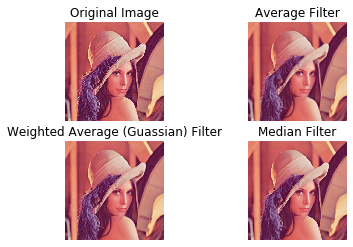

In [15]:
#Orginal Image
imgs=[lena,lena_mean,lena_Guassian,lena_median ]
titiles = ['Original Image','Average Filter','Weighted Average (Guassian) Filter','Median Filter']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
    plt.title(titiles[i])
plt.show()


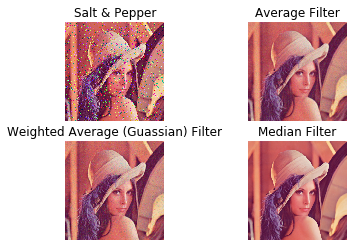

In [16]:
#Salt&Pepper noise Compairsion 
imgs2=[saltpepper,salt_mean,salt_Guassian,salt_median]
titiles2 = ['Salt & Pepper','Average Filter','Weighted Average (Guassian) Filter','Median Filter']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imgs2[i])
    plt.axis('off')
    plt.title(titiles2[i])
plt.show()



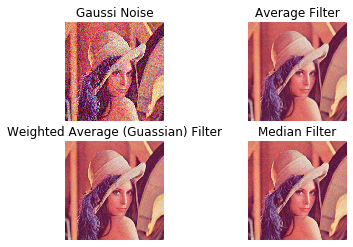

In [17]:
#Gaussian noise
imgs3=[gaussi,gaussi_mean,gaussi_Guassian,gaussi_median ]
titiles3 = ['Gaussi Noise','Average Filter','Weighted Average (Guassian) Filter','Median Filter']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imgs3[i])
    plt.axis('off')
    plt.title(titiles3[i])
plt.show()

**对比:** 从上面的对比图来看, 明显可以发现均值滤波和中值滤波在边缘的信息提取上有很大程度的损失. 均值滤波在对图像进行去噪时,细节部分造成了一定程度的损失,不能很好的去除噪声点, 特别是椒盐噪声. 中值滤波后图像的细节损失没有均值滤波之后的损失那么大,它在平滑脉冲噪声方面非常有效,同时它可以保护图像尖锐的边缘，选择适当的点来替代污染点的值，所以处理效果好，对椒盐噪声表现较好，对高斯噪声表现较差。 而Guassian Blur 在边缘信息提取上比均值滤波要更好一些但相较于原始图像, 但也有一定小程度的细节损失, 对于高斯造成很有效, 但对于椒盐噪声来说处理效果不够好

**2. 以Lena为原始图像，通过OpenCV使用Sobel及Canny算子检测，比较边缘检测结果.** 

In [34]:
lena2 = cv.cvtColor(cv.imread("lena.jpg"),cv.COLOR_BGR2RGB) 

In [35]:
lena_gray = cv.imread("lena.jpg", 0)

In [36]:
(thresh, im_g) = cv.threshold(lena_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

In [37]:
im_g = cv.threshold(lena_gray, thresh, 255, cv.THRESH_BINARY|cv.THRESH_OTSU)[1]

In [38]:
#Sobel算子边缘检测, 分别对x 和y 方向计算梯度
img = cv.imread('lena.jpg',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobel_x = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
sobel_y = cv.Sobel(img,-1,0,1,ksize=3) 

In [39]:
abs_x = cv.convertScaleAbs(sobel_x)
abs_y = cv.convertScaleAbs(sobel_y)
sobel_show = cv.addWeighted(abs_x,0.5,abs_y,0.5,0)

In [40]:

np.set_printoptions(threshold=np.inf)
#print(sobel_x)
 
sobelCombined = sobel_x + sobel_y #按位或


In [41]:
img = cv.imread('lena.jpg',1)
d = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
sp = d.shape
print(sp)
height = sp[0]
weight = sp[1]
sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
dSobel = np.zeros((height,weight))
dSobelx = np.zeros((height,weight))
dSobely = np.zeros((height,weight))
Gx = np.zeros(d.shape)
Gy = np.zeros(d.shape)
for i in range(height-2):
    for j in range(weight-2):
        Gx[i + 1, j + 1] = abs(np.sum(d[i:i + 3, j:j + 3] * sx))
        Gy[i + 1, j + 1] = abs(np.sum(d[i:i + 3, j:j + 3] * sy))
        dSobel[i+1, j+1] = (Gx[i+1, j+1]*Gx[i+1,j+1] + Gy[i+1, j+1]*Gy[i+1,j+1])**0.5
        dSobelx[i+1, j+1] = np.sqrt(Gx[i+1, j+1])
        dSobely[i + 1, j + 1] = np.sqrt(Gy[i + 1, j + 1])

        
a = np.uint8(dSobel)
b = np.uint8(dSobelx)
c = np.uint8(dSobel)
img = img[:, :, ::-1]

(512, 512)


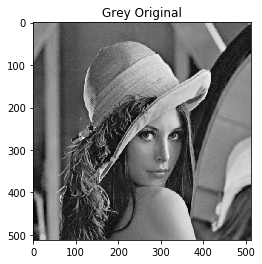

In [42]:

plt.imshow(d, cmap=plt.cm.gray), plt.title('Grey Original')

plt.show()

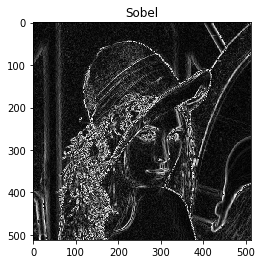

In [43]:
plt.imshow(a, cmap=plt.cm.gray), plt.title('Sobel')
plt.show()

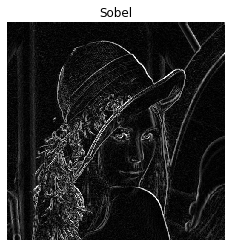

In [44]:
sobel_x = cv.Sobel(d,cv.CV_64F,1,0,ksize=3)
sobel_y = cv.Sobel(d,-1,0,1,ksize=3) 
abs_x = cv.convertScaleAbs(sobel_x)
abs_y = cv.convertScaleAbs(sobel_y)
sobel_show = cv.addWeighted(abs_x,0.5,abs_y,0.5,0)
plt.imshow(sobel_show,cmap=plt.cm.gray) 
plt.axis('off')
plt.title('Sobel')
plt.show()

In [21]:
canny1 = cv.Canny(img,200,300) 

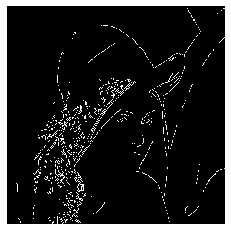

In [25]:
plt.imshow(canny1, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

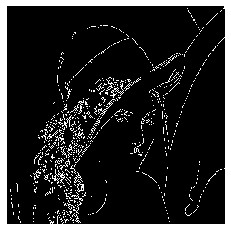

In [29]:
canny2 = cv.Canny(img,100,300)
plt.imshow(canny2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

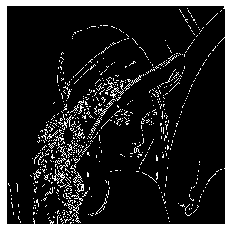

In [31]:
canny3 = cv.Canny(img,100,200)
plt.imshow(canny3, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

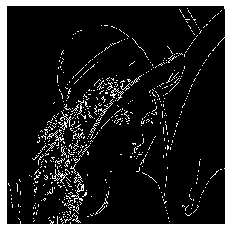

In [46]:
canny4 = cv.Canny(img,150,250)
plt.imshow(canny4, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [32]:
import cv2
import numpy as np

m1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
m2 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
from matplotlib import pyplot as plt
# 第一步：完成高斯平滑滤波
img = cv2.imread("lena.jpg", 1)
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv2.GaussianBlur(img, (3, 3), 2)
# 第二步：完成一阶有限差分计算，计算每一点的梯度幅值与方向
img1 = np.zeros(img.shape, dtype="uint8")  # 与原图大小相同
theta = np.zeros(img.shape, dtype="float")  # 方向矩阵原图像大小
img = cv2.copyMakeBorder(img, 1, 1, 1, 1, borderType=cv2.BORDER_REPLICATE)
rows, cols = img.shape
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        Gy = [np.sum(m2 * img[i - 1:i + 2, j - 1:j + 2])]
        #Gy = (np.dot(np.array([1, 1, 1]), (m2 * img[i - 1:i + 2, j - 1:j + 2]))).dot(np.array([[1], [1], [1]]))
        Gx = [np.sum(m1 * img[i - 1:i + 2, j - 1:j + 2])]
        #Gx = (np.dot(np.array([1, 1, 1]), (m1 * img[i - 1:i + 2, j - 1:j + 2]))).dot(np.array([[1], [1], [1]]))
        if Gx[0] == 0:
            theta[i - 1, j - 1] = 90
            continue
        else:
            temp = ((np.arctan2(Gy[0], Gx[0])) * 180 / np.pi)+90
        if Gx[0] * Gy[0] > 0:
            if Gx[0] > 0:
                # 第一象线
                theta[i - 1, j - 1] = np.abs(temp)
            else:
                # 第三象线
                theta[i - 1, j - 1] = (np.abs(temp) - 180)
        if Gx[0] * Gy[0] < 0:
            if Gx[0] > 0:
                # 第四象线
                theta[i - 1, j - 1] = (-1) * np.abs(temp)
            else:
                # 第二象线
                theta[i - 1, j - 1] = 180 - np.abs(temp)
        
        img1[i - 1, j - 1] = (np.sqrt(Gx[0] ** 2 + Gy[0] ** 2))
for i in range(1, rows - 2):
    for j in range(1, cols - 2):
        if (((theta[i, j] >= -22.5) and (theta[i, j] < 22.5)) or
                ((theta[i, j] <= -157.5) and (theta[i, j] >= -180)) or
                ((theta[i, j] >= 157.5) and (theta[i, j] < 180))):
            theta[i, j] = 0.0
        elif (((theta[i, j] >= 22.5) and (theta[i, j] < 67.5)) or
              ((theta[i, j] <= -112.5) and (theta[i, j] >= -157.5))):
            theta[i, j] = -45.0
        elif (((theta[i, j] >= 67.5) and (theta[i, j] < 112.5)) or
              ((theta[i, j] <= -67.5) and (theta[i, j] >= -112.5))):
            theta[i, j] = 90.0
        elif (((theta[i, j] >= 112.5) and (theta[i, j] < 157.5)) or
              ((theta[i, j] <= -22.5) and (theta[i, j] >= -67.5))):
            theta[i, j] = 45.0
'''
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        Gy = [np.sum(m2 * img[i - 1:i + 2, j - 1:j + 2])]
        #Gy = (np.dot(np.array([1, 1, 1]), (m2 * img[i - 1:i + 2, j - 1:j + 2]))).dot(np.array([[1], [1], [1]]))
        Gx = [np.sum(m1 * img[i - 1:i + 2, j - 1:j + 2])]
        #Gx = (np.dot(np.array([1, 1, 1]), (m1 * img[i - 1:i + 2, j - 1:j + 2]))).dot(np.array([[1], [1], [1]]))
        if Gx[0] == 0:
            theta[i - 1, j - 1] = 90
            continue
        else:
            temp = (np.arctan2(Gy[0], Gx[0])) * 180 / np.pi)
        if Gx[0] * Gy[0] > 0:
            if Gx[0] > 0:
                # 第一象线
                theta[i - 1, j - 1] = np.abs(temp)
            else:
                # 第三象线
                theta[i - 1, j - 1] = (np.abs(temp) - 180)
        if Gx[0] * Gy[0] < 0:
            if Gx[0] > 0:
                # 第四象线
                theta[i - 1, j - 1] = (-1) * np.abs(temp)
            else:
                # 第二象线
                theta[i - 1, j - 1] = 180 - np.abs(temp)
        
        img1[i - 1, j - 1] = (np.sqrt(Gx[0] ** 2 + Gy[0] ** 2))
for i in range(1, rows - 2):
    for j in range(1, cols - 2):
        if (((theta[i, j] >= -22.5) and (theta[i, j] < 22.5)) or
                ((theta[i, j] <= -157.5) and (theta[i, j] >= -180)) or
                ((theta[i, j] >= 157.5) and (theta[i, j] < 180))):
            theta[i, j] = 90.0
        elif (((theta[i, j] >= 22.5) and (theta[i, j] < 67.5)) or
              ((theta[i, j] <= -112.5) and (theta[i, j] >= -157.5))):
            theta[i, j] = 45.0
        elif (((theta[i, j] >= 67.5) and (theta[i, j] < 112.5)) or
              ((theta[i, j] <= -67.5) and (theta[i, j] >= -112.5))):
            theta[i, j] = 0.0
        elif (((theta[i, j] >= 112.5) and (theta[i, j] < 157.5)) or
              ((theta[i, j] <= -22.5) and (theta[i, j] >= -67.5))):
            theta[i, j] = -45.0

'''
# 第三步：进行 非极大值抑制计算
img2 = np.zeros(img1.shape)  # 非极大值抑制图像矩阵

for i in range(1, img2.shape[0] - 1):
    for j in range(1, img2.shape[1] - 1):
        # 0度j不变
        if (theta[i, j] == 0.0) and (img1[i, j] == np.max([img1[i, j], img1[i + 1, j], img1[i - 1, j]])):
            img2[i, j] = img1[i, j]

        if (theta[i, j] == -45.0) and img1[i, j] == np.max([img1[i, j], img1[i - 1, j - 1], img1[i + 1, j + 1]]):
            img2[i, j] = img1[i, j]

        if (theta[i, j] == 90.0) and img1[i, j] == np.max([img1[i, j], img1[i, j + 1], img1[i, j - 1]]):
            img2[i, j] = img1[i, j]

        if (theta[i, j] == 45.0) and img1[i, j] == np.max([img1[i, j], img1[i - 1, j + 1], img1[i + 1, j - 1]]):
            img2[i, j] = img1[i, j]

# 第四步：双阈值检测和边缘连接
img3 = np.zeros(img2.shape)  # 定义双阈值图像
# TL = 0.4*np.max(img2)
# TH = 0.5*np.max(img2)
TL = 50
TH = 100
# 关键在这两个阈值的选择
for i in range(1, img3.shape[0] - 1):
    for j in range(1, img3.shape[1] - 1):
        if img2[i, j] < TL:
            img3[i, j] = 0
        elif img2[i, j] > TH:
            img3[i, j] = 255
        elif ((img2[i + 1, j] < TH) or (img2[i - 1, j] < TH) or (img2[i, j + 1] < TH) or
              (img2[i, j - 1] < TH) or (img2[i - 1, j - 1] < TH) or (img2[i - 1, j + 1] < TH) or
              (img2[i + 1, j + 1] < TH) or (img2[i + 1, j - 1] < TH)):
            img3[i, j] = 255



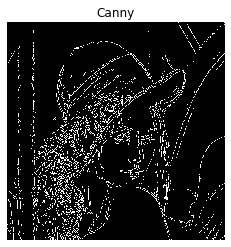

In [33]:
plt.imshow(img3, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Canny')
plt.show()

Sobel 算子据像素点上下、左右邻点灰度加权差，在边缘处达到极值这一现象检测边缘。对噪声具有平滑作用，提供较为精确的边缘方向信息，边缘定位精度不够高。当对精度要求不是很高时，是一种较为常用的边缘检测方法。相比之下Canny 算子对噪声有一定的抑制, 能够较精准的

**3. 在OpenCV安装目录下找到课程对应演示图片(安装目录\sources\samples\data)，首先计算灰度直方图，进一步使用大津算法进行分割，并比较分析分割结果**

In [97]:
import pandas as pd
from tqdm import tqdm
image = cv.imread("pic2.png",0)
h = image.shape[0]
w = image.shape[1]

## 唯一确定阈值
a = 150
new_image = np.zeros((h,w),np.uint8)
for i in tqdm(range(h)):
    for j in range(w):
        if(image[i,j]> a ):
            new_image[i,j] = 255
        else:
            new_image[i,j] = 0

100%|██████████| 300/300 [00:00<00:00, 1124.02it/s]


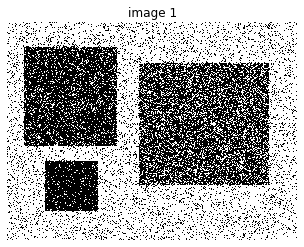

In [98]:
plt.imshow(new_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('image 1')
plt.show()

(Text(0.5, 1.0, 'Histogram'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

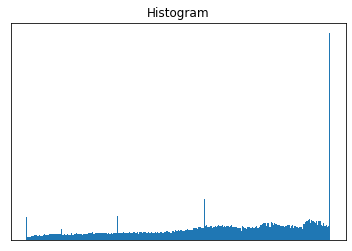

In [99]:
plt.title("source image"), plt.xticks([]), plt.yticks([])
plt.hist(image.ravel(), 255)
plt.title("Histogram"), plt.xticks([]), plt.yticks([])

100%|██████████| 300/300 [00:00<00:00, 932.09it/s]


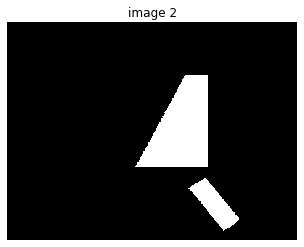

In [100]:
image = cv.imread("pic6.png",0)
h = image.shape[0]
w = image.shape[1]

## 唯一确定阈值
a = 150
new_image = np.zeros((h,w),np.uint8)
for i in tqdm(range(h)):
    for j in range(w):
        if(image[i,j]> a ):
            new_image[i,j] = 255
        else:
            new_image[i,j] = 0
            

plt.imshow(new_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('image 2')
plt.show()

(Text(0.5, 1.0, 'Histogram'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

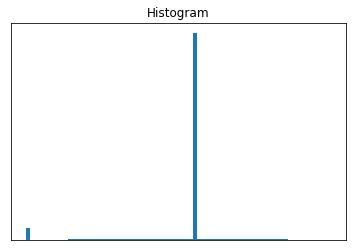

In [101]:
plt.title("source image"),plt.xticks([]), plt.yticks([])
plt.hist(image.ravel(),80)
plt.title("Histogram"), plt.xticks([]), plt.yticks([])

100%|██████████| 300/300 [00:00<00:00, 1365.42it/s]


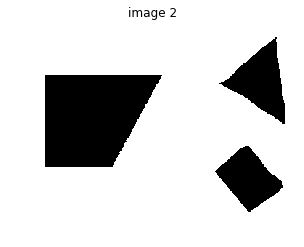

In [111]:
image = cv.imread("pic6.png",0)
h = image.shape[0]
w = image.shape[1]

## 唯一确定阈值
a = 125
new_image = np.zeros((h,w),np.uint8)
for i in tqdm(range(h)):
    for j in range(w):
        if(image[i,j]> a ):
            new_image[i,j] = 255
        else:
            new_image[i,j] = 0
            

plt.imshow(new_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('image 2')
plt.show()

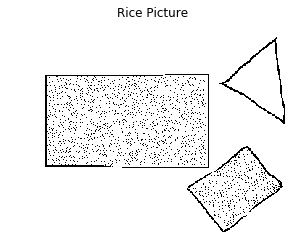

In [110]:
image = cv.imread("pic6.png",0)

th6 = cv.adaptiveThreshold(image, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,5,1) 
plt.imshow(th6, cmap=plt.cm.gray)

plt.axis('off')
plt.title('Rice Picture')
plt.show()

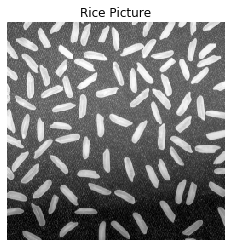

In [43]:
image = cv.imread("米粒图片.png",0)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show()

100%|██████████| 256/256 [00:00<00:00, 1921.04it/s]


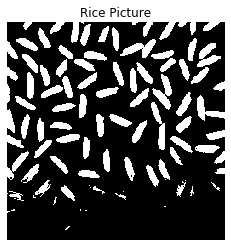

In [8]:
image = cv.imread("米粒图片.png",0)
h = image.shape[0]
w = image.shape[1]

## 唯一确定阈值
a = 150
new_image = np.zeros((h,w),np.uint8)
for i in tqdm(range(h)):
    for j in range(w):
        if(image[i,j]> a ):
            new_image[i,j] = 255
        else:
            new_image[i,j] = 0
            

plt.imshow(new_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show()

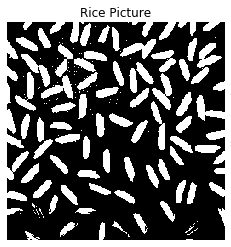

In [11]:
image = cv.imread("米粒图片.png",0)
ret1, th1 = cv.threshold(image, 127, 255, cv.THRESH_BINARY) 

plt.imshow(th1, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show()

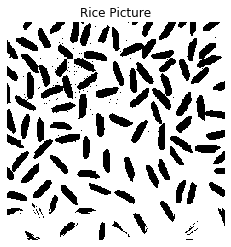

In [14]:
image = cv.imread("米粒图片.png",0)
ret, th2 = cv.threshold(image, 127, 255, cv.THRESH_BINARY_INV)
plt.imshow(th2, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show()

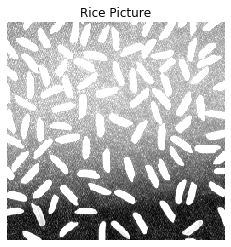

In [20]:
ret, th3 = cv.threshold(image, 127, 255, cv.THRESH_TRUNC)

plt.imshow(th3, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show() 

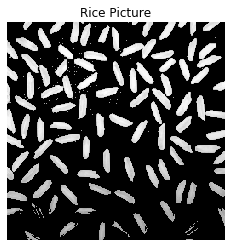

In [17]:
ret, th4 = cv.threshold(image, 127, 255, cv.THRESH_TOZERO)

plt.imshow(th4, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show()

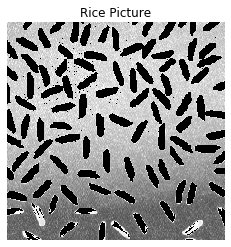

In [18]:
ret, th5 = cv.threshold(image, 127, 255, cv.THRESH_TOZERO_INV)
plt.imshow(th5, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show()

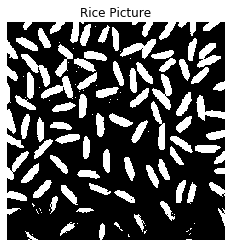

In [80]:
ret, th = cv.threshold(image, 81, 255, cv.THRESH_OTSU)
plt.imshow(th, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rice Picture')
plt.show()

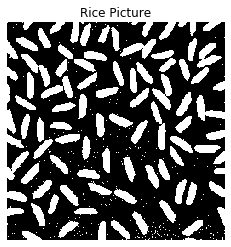

In [83]:
#局部阈值计算
#一般block size 为奇数, 保证中心有位置
image = cv.imread("米粒图片.png",1)
image = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
th6 = cv.adaptiveThreshold(image, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,131,1) 
plt.imshow(th6, cmap=plt.cm.gray)

plt.axis('off')
plt.title('Rice Picture')
plt.show()

**4. 使用米粒图像，分割得到各米粒，首先计算各区域(米粒)的面积、长度等信息，进一步计算面积、长度的均值及方差，分析落在3sigma范围内米粒的数量** 